WEEK 9:
Build model using SVM with different kernels.

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [43]:
from sklearn import datasets
iris = datasets.load_iris()

X1_sepal = iris.data[:,[0,1]]
X2_petal = iris.data[:,[2,3]]
y = iris.target

print(X1_sepal[1:5,:])
print(X2_petal[1:5,:])
print(y)

[[4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
[[1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Text(0, 0.5, 'Petal width')

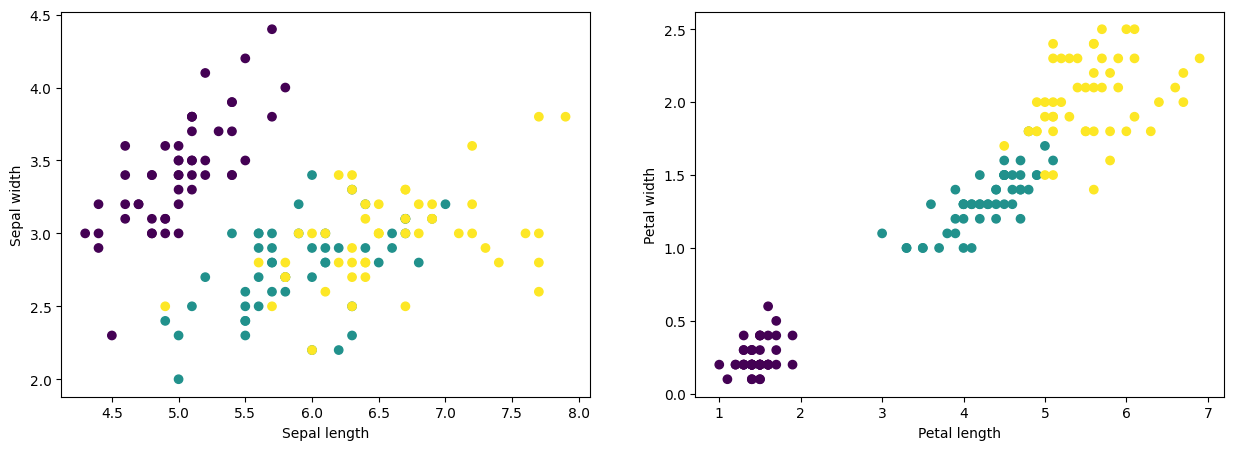

In [44]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(X1_sepal[:, 0], X1_sepal[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.subplot(1,2,2)
plt.scatter(X2_petal[:, 0], X2_petal[:, 1], c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

In [45]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    # Initialise the marker types and colors
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    color_Map = ListedColormap(colors[:len(np.unique(y))]) #we take the color mapping correspoding to the 
                                                            #amount of classes in the target data
    
    # Parameters for the graph and decision surface
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot samples
    X_test, Y_test = X[test_idx,:], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = color_Map(idx),
                    marker = markers[idx], label = cl
                   )

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#######################################################################
## SPLITTING


X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(X1_sepal,y,test_size=0.3,random_state=0)

print("# training samples sepal: ", len(X_train_sepal))
print("# testing samples sepal: ", len(X_test_sepal))

X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(X2_petal,y,test_size=0.3,random_state=0)

print("# training samples petal: ", len(X_train_petal))
print("# testing samples petal: ", len(X_test_petal))

#####################################################################
## SCALING

sc = StandardScaler()
X_train_sepal_std = sc.fit_transform(X_train_sepal)
X_test_sepal_std = sc.transform(X_test_sepal)

sc = StandardScaler()
X_train_petal_std = sc.fit_transform(X_train_petal)
X_test_petal_std = sc.transform(X_test_petal)

#####################################################################
## COMBINING FOR FUTURE PLOTTING

X_combined_sepal_standard = np.vstack((X_train_sepal_std,X_test_sepal_std))
Y_combined_sepal = np.hstack((y_train_sepal, y_test_sepal))

X_combined_petal_standard = np.vstack((X_train_petal_std,X_test_petal_std))
Y_combined_petal = np.hstack((y_train_petal, y_test_petal))

# training samples sepal:  105
# testing samples sepal:  45
# training samples petal:  105
# testing samples petal:  45


   C_parameter  Accuracy
0         0.01       0.6
1         0.10  0.777778
2         1.00       0.8
3        10.00       0.8
4       100.00       0.8


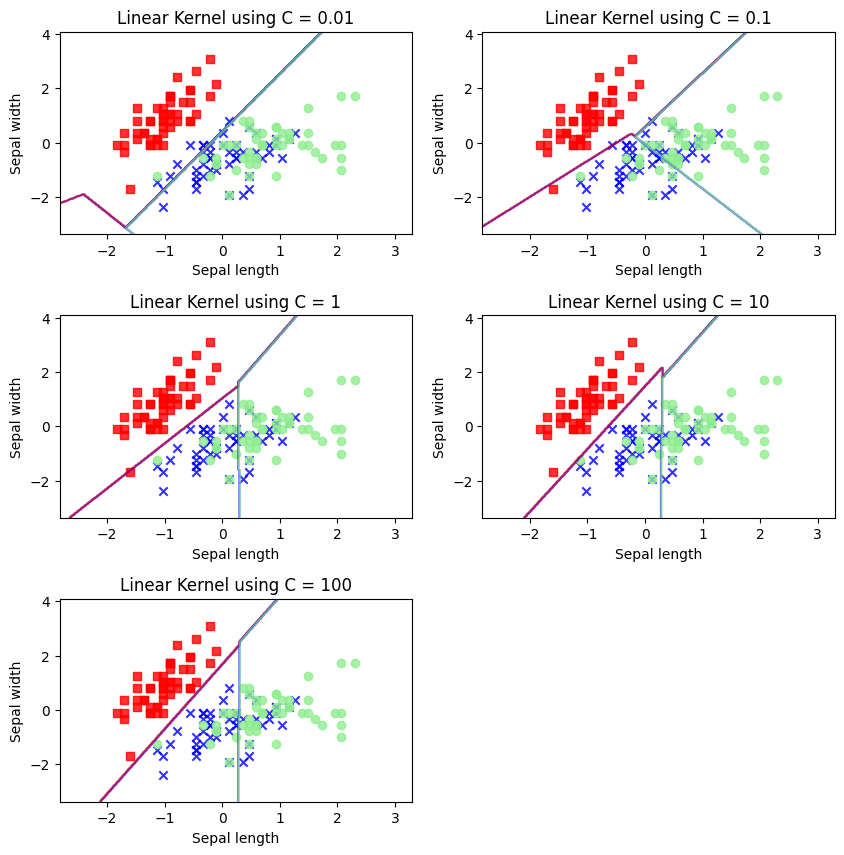

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C_param_range = [0.01,0.1,1,10,100]

sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
sepal_acc_table['C_parameter'] = C_param_range

plt.figure(figsize=(10, 10))

j = 0

for i in C_param_range:
    
    # Apply SVM model to training data
    svm_linear =  SVC(kernel = 'linear', C = i, random_state = 0)
    svm_linear.fit(X_train_sepal_std,y_train_sepal)
    
    # Predict using model
    y_pred_sepal = svm_linear.predict(X_test_sepal_std)
    
    # Saving accuracy score in table
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_sepal_standard
                      , y = Y_combined_sepal
                      , classifier = svm_linear
                      , test_idx = range(105,150))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Linear Kernel using C = %s'%i)
    
print(sepal_acc_table)

   degree  Accuracy
0       1       0.8
1       2  0.644444
2       3  0.666667
3       4  0.422222
4       5  0.644444
5       6       0.4


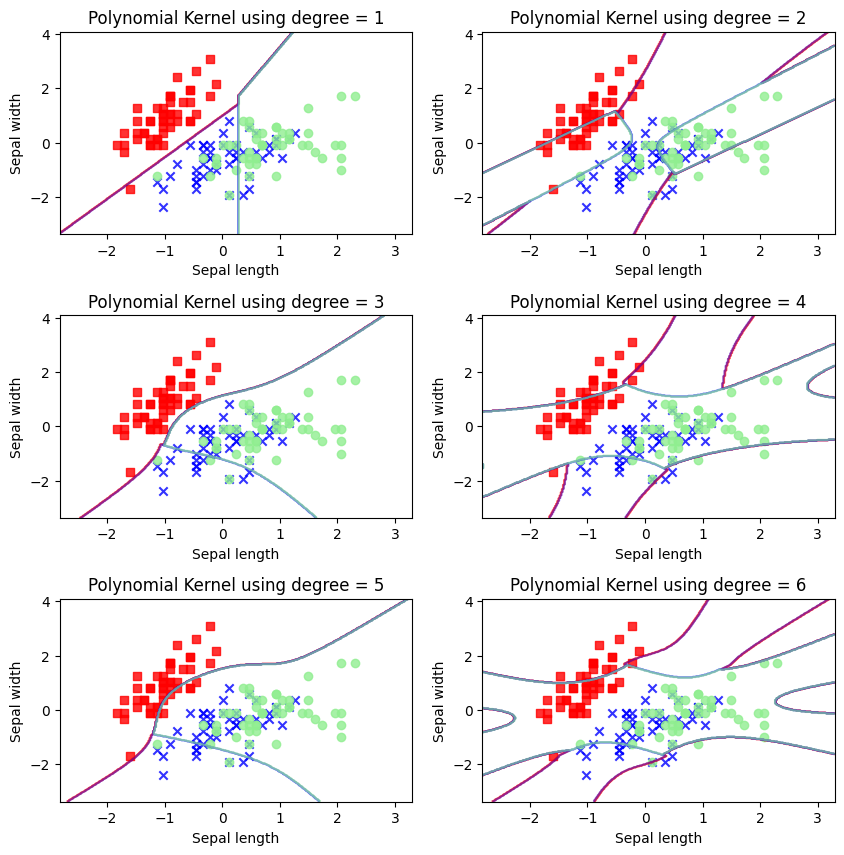

In [48]:
polynomial_degree_range = [1,2,3,4,5,6] 

sepal_acc_table = pd.DataFrame(columns = ['degree','Accuracy'])
sepal_acc_table['degree'] = polynomial_degree_range

plt.figure(figsize=(10, 10))

j = 0

for i in polynomial_degree_range:
    
    # Apply SVM model to training data
    svm_poly =  SVC(kernel = 'poly', degree = i, C = 1, random_state = 0)
    svm_poly.fit(X_train_sepal_std,y_train_sepal)
    
    # Predict using model
    y_pred_sepal = svm_poly.predict(X_test_sepal_std)
    
    # Saving accuracy score in table
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_sepal_standard
                      , y = Y_combined_sepal
                      , classifier = svm_poly
                      )
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Polynomial Kernel using degree = %s'%i)
    
print(sepal_acc_table)

   degree  Accuracy
0       1  0.777778
1       2  0.777778
2       3  0.777778
3       4  0.777778
4       5  0.777778
5       6  0.777778


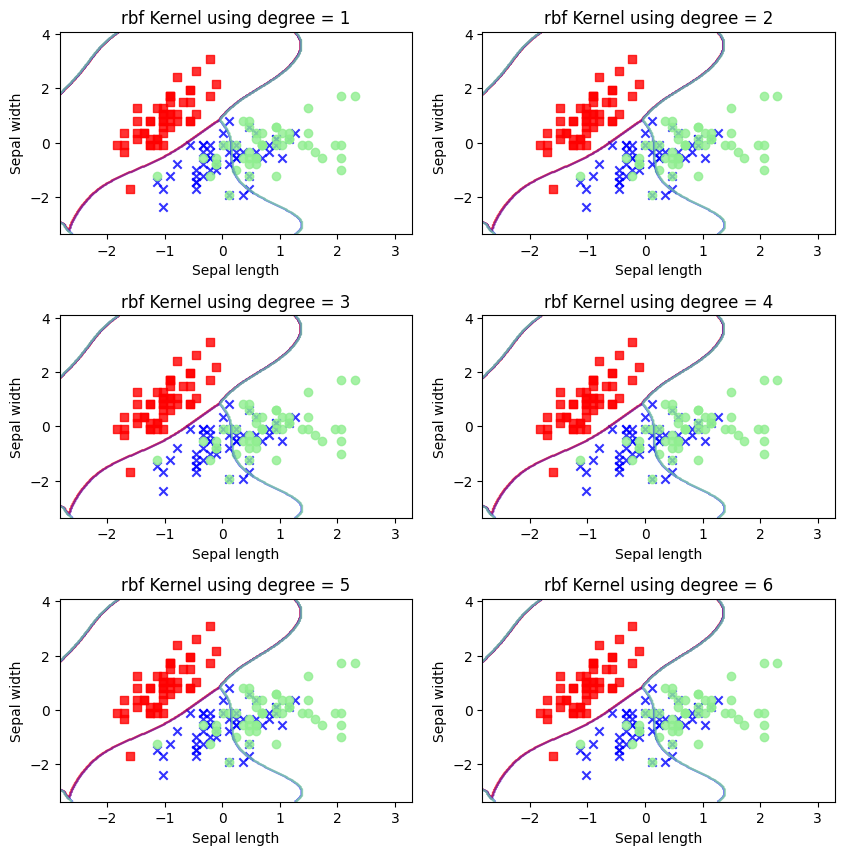

In [49]:
#RADIAL BASIS FUNCTION kernel
rbf_degree_range = [1,2,3,4,5,6]

sepal_acc_table = pd.DataFrame(columns = ['degree','Accuracy'])
sepal_acc_table['degree'] = rbf_degree_range

plt.figure(figsize=(10, 10))

j = 0

for i in rbf_degree_range:
    
    # Apply SVM model to training data
    svm_rbf =  SVC(kernel = 'rbf', degree = i, C = 1, random_state = 0)
    svm_rbf.fit(X_train_sepal_std,y_train_sepal)
    
    # Predict using model
    y_pred_sepal = svm_rbf.predict(X_test_sepal_std)
    
    # Saving accuracy score in table
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_sepal_standard
                      , y = Y_combined_sepal
                      , classifier = svm_rbf
                      )
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('rbf Kernel using degree = %s'%i)
    
print(sepal_acc_table)